# IS 362 - Final Project
## by Marek Dziwirek and Melanie Pruneda


![FDNY logo](images/fdny_logo.jpeg)

### Analyzing FDNY Data from NYC Open Data

For our final project, we analyze three datasets from [NYC Open Data](https://opendata.cityofnewyork.us "NYC Open Data") relating to the Fire Department of New York.  Using "FDNY Firehouse Listing", "Incidents Responded to by Fire Companies", and "FDNY Monthly Response Times" we will answer the following questions:
- [Q1 Where are the Manhattan firehouses located?](#Q1:-Where-are-the-Manhattan-firehouses-located?)
- [Q2 What is the distribution of firehouses by borough?](#Q2:-What-is-the-distribution-of-firehouses-by-borough?)
- [Q3 What were the top 5 most common incident types reported in 2017?](#Q3:-What-were-the-top-5-most-common-incident-types-reported-in-2017?)
- [Q4 What is the distribution of the incidents in 2017 by borough?](#Q4:-What-is-the-distribution-of-the-incidents-in-2017-by-borough?)
- [Q5 How many building fire incidents were there in 2017?](#Q5:-How-many-building-fire-incidents-were-there-in-2017?)
- [Q6 What is the percentage by borough of the building fire incidents in 2017?](#Q6:-What-is-the-percentage-by-borough-of-the-building-fire-incidents-in-2017?)
- [Q7 What is the FDNY average response time by borough?](#Q7:-What-is-the-FDNY-average-response-time-by-borough?)

**We begin by importing necessary libraries, reading in the FDNY Firehouse Listing, and displaying the top 5 lines.  We see that data includes facility names, addresses and latitude and longitude coordinates.**

In [1]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import folium
%matplotlib inline

# reads data from csv and save in variable
firehouse = pd.read_csv("data/FDNY_Firehouse_Listing.csv")
firehouse.head()

,FacilityName,FacilityAddress,Borough,Postcode,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,Engine 4/Ladder 15,42 South Street,Manhattan,10005.0,40.703466,-74.007538,1.0,1.0,7.0,1000867.0,1.000350e+09,Battery Park City-Lower Manhattan ...
1,Engine 10/Ladder 10,124 Liberty Street,Manhattan,10006.0,40.710072,-74.012523,1.0,1.0,13.0,1075700.0,1.000520e+09,Battery Park City-Lower Manhattan ...
2,Engine 6,49 Beekman Street,Manhattan,10038.0,40.710048,-74.005245,1.0,1.0,1501.0,1001287.0,1.000930e+09,Battery Park City-Lower Manhattan ...
3,Engine 7/Ladder 1/Battalion 1/Manhattan Boroug...,100-104 Duane Street,Manhattan,10007.0,40.715463,-74.005938,1.0,1.0,33.0,1001647.0,1.001500e+09,SoHo-TriBeCa-Civic Center-Little Italy ...
4,Ladder 8,14 North Moore Street,Manhattan,10013.0,40.719759,-74.006678,1.0,1.0,33.0,1002150.0,1.001890e+09,SoHo-TriBeCa-Civic Center-Little Italy ...


**Next, we filter the data to display only firehouses located in the borough of Manhattan and display the top 10 lines.**

In [2]:
# filters column 'Borough' and displays rows that only match Manhattan
FDNY_Manhattan = firehouse[firehouse['Borough'].str.match('Manhattan')]
FDNY_Manhattan.head(10)

,FacilityName,FacilityAddress,Borough,Postcode,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,Engine 4/Ladder 15,42 South Street,Manhattan,10005.0,40.703466,-74.007538,1.0,1.0,7.0,1000867.0,1.000350e+09,Battery Park City-Lower Manhattan ...
1,Engine 10/Ladder 10,124 Liberty Street,Manhattan,10006.0,40.710072,-74.012523,1.0,1.0,13.0,1075700.0,1.000520e+09,Battery Park City-Lower Manhattan ...
2,Engine 6,49 Beekman Street,Manhattan,10038.0,40.710048,-74.005245,1.0,1.0,1501.0,1001287.0,1.000930e+09,Battery Park City-Lower Manhattan ...
3,Engine 7/Ladder 1/Battalion 1/Manhattan Boroug...,100-104 Duane Street,Manhattan,10007.0,40.715463,-74.005938,1.0,1.0,33.0,1001647.0,1.001500e+09,SoHo-TriBeCa-Civic Center-Little Italy ...
4,Ladder 8,14 North Moore Street,Manhattan,10013.0,40.719759,-74.006678,1.0,1.0,33.0,1002150.0,1.001890e+09,SoHo-TriBeCa-Civic Center-Little Italy ...
5,Engine 9/Ladder 6,75 Canal Street,Manhattan,10002.0,40.715213,-73.992901,3.0,1.0,16.0,1003898.0,1.003000e+09,Chinatown ...
6,Engine 15/Ladder 18/Battalion 4,25 Pitt Street,Manhattan,10002.0,40.716395,-73.983478,3.0,1.0,12.0,1004078.0,1.003420e+09,Lower East Side ...
7,Engine 28/Ladder 11,222 East 2nd Street,Manhattan,10009.0,40.721682,-73.982622,3.0,2.0,2202.0,1004608.0,1.003850e+09,Lower East Side ...
8,Engine 5,340 East 14th Street,Manhattan,10003.0,40.731752,-73.983536,3.0,2.0,40.0,1006520.0,1.004550e+09,East Village ...
9,Engine 55,363 Broome Street,Manhattan,10013.0,40.720033,-73.995689,2.0,1.0,41.0,1066722.0,1.004700e+09,SoHo-TriBeCa-Civic Center-Little Italy ...


**We check to see whether any columns contain null values.**

In [3]:
FDNY_Manhattan.isnull().any()

FacilityName          False
FacilityAddress       False
Borough               False
Postcode               True
Latitude               True
Longitude              True
Community Board        True
Community Council      True
Census Tract           True
BIN                    True
BBL                    True
NTA                    True
dtype: bool

**Next, we drop any rows that contain NaN values and confirm that no columns contain null values.**

In [4]:
FDNY = FDNY_Manhattan.dropna(axis=0, how='any')
FDNY.isnull().any()

FacilityName          False
FacilityAddress       False
Borough               False
Postcode              False
Latitude              False
Longitude             False
Community Board       False
Community Council     False
Census Tract          False
BIN                   False
BBL                   False
NTA                   False
dtype: bool

**With clean data we can use latitude and longtitude data to indicate every firehouse in the borough of Manhattan.**

In [5]:
# creates a list of latitude and longtitude that help iterate over the data
locations = FDNY[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[40.721682, -73.98262199999999]

**We use the `folium` module to create an interactive map to answer the question:**

## Q1: Where are the Manhattan firehouses located?

In [6]:
map = folium.Map(location=[40.7, -73.9], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=FDNY['FacilityName'][point]).add_to(map)
map

***
**Next, we use a simple count to display the number of firehouses by borough.**

In [7]:
# counts firehouses by Borough
firehouse_by_boro = firehouse.groupby('Borough').Borough.count()
firehouse_by_boro

Borough
Bronx            34
Brooklyn         66
Manhattan        48
Queens           50
Staten Island    20
Name: Borough, dtype: int64

**Next, we use a bar graph to answer the question:**

## Q2: What is the distribution of firehouses by borough?

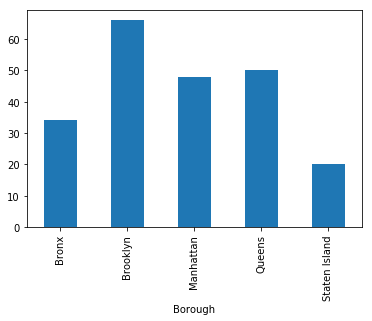

In [8]:
firehouse_by_boro.plot.bar()

***

**Now we move on to analyzing Incidents Responded to by Fire Companies.  This dataset contains over 2 million rows and includes column listings such as incident date and time, incident type description, and borough. We perform various data tidying tasks to make it more manageable.**

In [9]:
# reads data from csv and save in variable
incidents = pd.read_csv("data/Incidents_Responded_to_by_Fire_Companies.csv", low_memory=False)
incidents.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
0,55672688,2147,"300 - Rescue, EMS incident, other",01/01/2013 12:00:20 AM,01/01/2013 12:14:23 AM,1.0,01/01/2013 12:20:06 AM,"1 - More than initial alarm, less than Signal 7-5",1186.0,"00 - Action taken, other",...,10454,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55672692,0818,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:00:37 AM,01/01/2013 12:09:03 AM,3.0,01/01/2013 12:30:06 AM,"1 - More than initial alarm, less than Signal 7-5",1769.0,86 - Investigate,...,10036,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55672693,9656,"300 - Rescue, EMS incident, other",01/01/2013 12:01:17 AM,01/01/2013 12:04:55 AM,1.0,01/01/2013 12:15:18 AM,"1 - More than initial alarm, less than Signal 7-5",841.0,"00 - Action taken, other",...,11418,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55672695,7412,412 - Gas leak (natural gas or LPG),01/01/2013 12:02:32 AM,01/01/2013 12:07:48 AM,4.0,01/01/2013 12:40:11 AM,"1 - More than initial alarm, less than Signal 7-5",2259.0,44 - Hazardous materials leak control & contai...,...,11103,5 - Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55672697,4019,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:01:49 AM,01/01/2013 12:06:27 AM,6.0,01/01/2013 12:24:56 AM,"1 - More than initial alarm, less than Signal 7-5",1387.0,86 - Investigate,...,11385,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**In order to work with the data, we need to check each column for data types.**

In [10]:
# checks for data types
incidents.dtypes

IM_INCIDENT_KEY                   int64
FIRE_BOX                         object
INCIDENT_TYPE_DESC               object
INCIDENT_DATE_TIME               object
ARRIVAL_DATE_TIME                object
UNITS_ONSCENE                   float64
LAST_UNIT_CLEARED_DATE_TIME      object
HIGHEST_LEVEL_DESC               object
TOTAL_INCIDENT_DURATION         float64
ACTION_TAKEN1_DESC               object
ACTION_TAKEN2_DESC               object
ACTION_TAKEN3_DESC               object
PROPERTY_USE_DESC                object
STREET_HIGHWAY                   object
ZIP_CODE                         object
BOROUGH_DESC                     object
FLOOR                            object
CO_DETECTOR_PRESENT_DESC         object
FIRE_ORIGIN_BELOW_GRADE_FLAG    float64
STORY_FIRE_ORIGIN_COUNT         float64
FIRE_SPREAD_DESC                 object
DETECTOR_PRESENCE_DESC           object
AES_PRESENCE_DESC                object
STANDPIPE_SYS_PRESENT_FLAG      float64
dtype: object

**We want to filter our data to display incidents within a specific time period. Since the incident_date_time column data is object type, we convert it to datetime type for filtering.  Then we display the last 5 rows.**

In [11]:
# converts string to datetime type
incidents['INCIDENT_DATE_TIME'] = pd.to_datetime(incidents['INCIDENT_DATE_TIME'])
incidents.tail()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
2277774,62589520,2225,"300 - Rescue, EMS incident, other",2017-12-27 12:06:29,NaN,NaN,12/27/2017 12:23:57 PM,"1 - More than initial alarm, less than Signal 7-5",1048.0,"00 - Action taken, other",...,10455,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2277775,62589522,3757,735B - Unnecessary alarm/alarm system testing ...,2017-12-27 12:08:21,NaN,NaN,12/27/2017 12:25:33 PM,"1 - More than initial alarm, less than Signal 7-5",1032.0,86 - Investigate,...,10463,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2277776,62589542,715,745A - Unnecessary alarm/ordinary household ac...,2017-12-27 12:05:10,NaN,NaN,12/27/2017 12:32:09 PM,"1 - More than initial alarm, less than Signal 7-5",1619.0,86 - Investigate,...,10016,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2277777,62589549,936,735A - Unwarranted alarm/defective condition o...,2017-12-27 12:13:40,NaN,NaN,12/27/2017 12:25:36 PM,"1 - More than initial alarm, less than Signal 7-5",716.0,86 - Investigate,...,10022,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2277778,62589556,1031,735A - Unwarranted alarm/defective condition o...,2017-12-27 12:19:51,NaN,NaN,12/27/2017 12:39:15 PM,"1 - More than initial alarm, less than Signal 7-5",1164.0,86 - Investigate,...,10021,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**We verify that the data has been changed to the desired type.**

In [12]:
incidents.dtypes

IM_INCIDENT_KEY                          int64
FIRE_BOX                                object
INCIDENT_TYPE_DESC                      object
INCIDENT_DATE_TIME              datetime64[ns]
ARRIVAL_DATE_TIME                       object
UNITS_ONSCENE                          float64
LAST_UNIT_CLEARED_DATE_TIME             object
HIGHEST_LEVEL_DESC                      object
TOTAL_INCIDENT_DURATION                float64
ACTION_TAKEN1_DESC                      object
ACTION_TAKEN2_DESC                      object
ACTION_TAKEN3_DESC                      object
PROPERTY_USE_DESC                       object
STREET_HIGHWAY                          object
ZIP_CODE                                object
BOROUGH_DESC                            object
FLOOR                                   object
CO_DETECTOR_PRESENT_DESC                object
FIRE_ORIGIN_BELOW_GRADE_FLAG           float64
STORY_FIRE_ORIGIN_COUNT                float64
FIRE_SPREAD_DESC                        object
DETECTOR_PRES

**Now that our data is properly converted we can filter it. We choose to filter the data and select only incidents that occurred in 2017, displaying the top 10 rows.**

In [13]:
ts = pd.to_datetime('1/1/2017')
oneyear = incidents.loc[incidents.INCIDENT_DATE_TIME >= ts, :]
oneyear.head(10)

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
1809424,60840813,591,735A - Unwarranted alarm/defective condition o...,2017-01-01 00:00:22,01/01/2017 12:04:23 AM,3.0,01/01/2017 12:10:29 AM,"1 - More than initial alarm, less than Signal 7-5",607.0,86 - Investigate,...,11217,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809425,60840819,8874,"300 - Rescue, EMS incident, other",2017-01-01 00:01:26,01/01/2017 12:06:24 AM,1.0,01/01/2017 12:17:03 AM,"1 - More than initial alarm, less than Signal 7-5",937.0,"00 - Action taken, other",...,11436,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809426,60840821,3664,"300 - Rescue, EMS incident, other",2017-01-01 00:02:38,01/01/2017 12:04:39 AM,1.0,01/01/2017 12:14:29 AM,"1 - More than initial alarm, less than Signal 7-5",711.0,"00 - Action taken, other",...,10312,3 - Staten Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809427,60840822,2207,735A - Unwarranted alarm/defective condition o...,2017-01-01 00:02:30,01/01/2017 12:06:06 AM,3.0,01/01/2017 12:16:27 AM,"1 - More than initial alarm, less than Signal 7-5",837.0,86 - Investigate,...,10451,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809428,60840824,926,"651 - Smoke scare, odor of smoke",2017-01-01 00:02:31,01/01/2017 12:06:22 AM,3.0,01/01/2017 12:23:11 AM,"1 - More than initial alarm, less than Signal 7-5",1240.0,"00 - Action taken, other",...,11213,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809429,60840825,1493,735A - Unwarranted alarm/defective condition o...,2017-01-01 00:02:39,01/01/2017 12:07:10 AM,2.0,01/01/2017 12:16:03 AM,"1 - More than initial alarm, less than Signal 7-5",804.0,86 - Investigate,...,10027,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809430,60840826,4213,745A - Unnecessary alarm/ordinary household ac...,2017-01-01 00:02:52,01/01/2017 12:10:34 AM,2.0,01/01/2017 12:19:38 AM,"1 - More than initial alarm, less than Signal 7-5",1006.0,86 - Investigate,...,11379,5 - Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809431,60840827,325,"651 - Smoke scare, odor of smoke",2017-01-01 00:04:00,01/01/2017 12:06:49 AM,3.0,01/01/2017 12:10:10 AM,"1 - More than initial alarm, less than Signal 7-5",370.0,"00 - Action taken, other",...,11211,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809432,60840829,1021,353 - Removal of victim(s) from stalled elevator,2017-01-01 00:04:45,01/01/2017 12:09:03 AM,1.0,01/01/2017 12:35:23 AM,"1 - More than initial alarm, less than Signal 7-5",1838.0,64 - Shut down system,...,10021,1 - Manhattan,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809433,60840831,765,735A - Unwarranted alarm/defective condition o...,2017-01-01 00:04:34,01/01/2017 12:07:44 AM,2.0,01/01/2017 12:09:13 AM,"1 - More than initial alarm, less than Signal 7-5",279.0,86 - Investigate,...,10302,3 - Staten Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Now, we count all the incidents and look for most common incident type reported in 2017.**

In [14]:
incident_count = oneyear.groupby('INCIDENT_TYPE_DESC').INCIDENT_TYPE_DESC.count().sort_values(ascending=False)
incident_count.head(30)

INCIDENT_TYPE_DESC
300 - Rescue, EMS incident, other                               169096
651 - Smoke scare, odor of smoke                                 28013
353 - Removal of victim(s) from stalled elevator                 26455
412 - Gas leak (natural gas or LPG)                              24225
710 - Malicious, mischievous false call, other                   23326
735A - Unwarranted alarm/defective condition of alarm system     22968
522 - Water or steam leak                                        19493
113 - Cooking fire, confined to container                        17838
555 - Defective elevator, no occupants                           11454
736 - CO detector activation due to malfunction                   9512
322 - Motor vehicle accident with injuries                        9266
445 - Arcing, shorted electrical equipment                        7466
323 - Motor vehicle/pedestrian accident (MV Ped)                  6185
740A - Unnecessary alarm/construction activities          

**Now we use a horizontal bar chart to visualize the answer to the question:**

## Q3: What were the top 5 most common incident types reported in 2017?

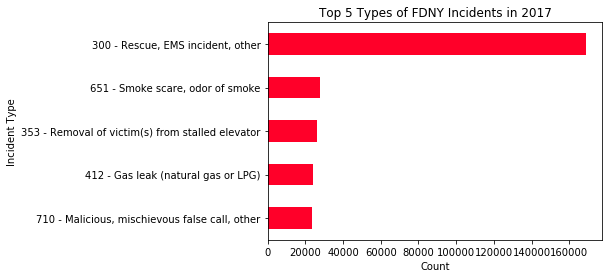

In [15]:
incident_count.head().plot.barh(colormap='gist_rainbow').invert_yaxis()
plt.ylabel('Incident Type')
plt.xlabel('Count')
plt.title('Top 5 Types of FDNY Incidents in 2017')

***

**Next, we count all the incidents and sort them by borough and use a bar chart to visualize the answer to the question:**

## Q4: What is the distribution of the incidents in 2017 by borough?

,INCIDENT_TYPE_DESC
BOROUGH_DESC,
4 - Brooklyn,137628
1 - Manhattan,118410
5 - Queens,94528
2 - Bronx,93760
3 - Staten Island,24029


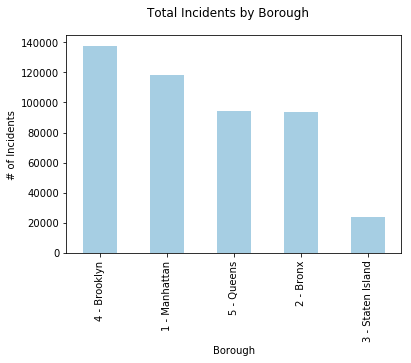

In [16]:
incidents_by_boro = oneyear.groupby('BOROUGH_DESC')['INCIDENT_TYPE_DESC'].count().sort_values(ascending=False)
incidents_by_boro.plot(kind='bar', stacked=True, colormap='Paired')
plt.suptitle('Total Incidents by Borough')
plt.xlabel('Borough')
plt.ylabel('# of Incidents')

graph_incidents_by_boro = pd.DataFrame(incidents_by_boro)
graph_incidents_by_boro

***

**Next, we filter our data again and select only 'Building fire' incidents that occurred in 2017, displaying the top 10 rows.**

In [17]:
# filters incident type description column for 'Building fire' incidents
Fire = oneyear[oneyear['INCIDENT_TYPE_DESC'].str.match('111 - Building fire')]
Fire.head(10)

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
1809477,60840937,4221,111 - Building fire,2017-01-01 00:26:34,01/01/2017 12:30:06 AM,15.0,01/01/2017 03:35:00 AM,7 - Signal 7-5,11306.0,11 - Extinguishment by fire service personnel,...,10461,2 - Bronx,NaN,NaN,NaN,1.0,4 - Confined to building of origin,N - None present,N - None Present,0.0
1809714,60841739,1253,111 - Building fire,2017-01-01 03:07:19,01/01/2017 03:10:15 AM,6.0,01/01/2017 03:20:06 AM,0 - Initial alarm,767.0,11 - Extinguishment by fire service personnel,...,10305,3 - Staten Island,NaN,NaN,NaN,5.0,1 - Confined to object of origin,1 - Present,N - None Present,0.0
1809883,60842334,9269,111 - Building fire,2017-01-01 06:08:36,01/01/2017 06:12:57 AM,6.0,01/01/2017 06:59:54 AM,7 - Signal 7-5,3078.0,11 - Extinguishment by fire service personnel,...,11435,5 - Queens,NaN,NaN,1.0,0.0,2 - Confined to room of origin,N - None present,N - None Present,0.0
1810187,60843298,9350,111 - Building fire,2017-01-01 12:34:37,01/01/2017 12:37:33 PM,7.0,01/01/2017 01:38:17 PM,7 - Signal 7-5,3820.0,11 - Extinguishment by fire service personnel,...,11368,5 - Queens,3rd,NaN,NaN,3.0,2 - Confined to room of origin,N - None present,N - None Present,0.0
1810193,60843323,3315,111 - Building fire,2017-01-01 12:37:50,01/01/2017 12:39:50 PM,6.0,01/01/2017 01:05:15 PM,"1 - More than initial alarm, less than Signal 7-5",1645.0,11 - Extinguishment by fire service personnel,...,11229,4 - Brooklyn,1,NaN,NaN,1.0,1 - Confined to object of origin,1 - Present,N - None Present,0.0
1810271,60843600,7831,111 - Building fire,2017-01-01 13:59:19,01/01/2017 02:02:36 PM,11.0,01/01/2017 04:49:07 PM,7 - Signal 7-5,10188.0,11 - Extinguishment by fire service personnel,...,11372,5 - Queens,NaN,NaN,NaN,3.0,3 - Confined to floor of origin,1 - Present,N - None Present,0.0
1810868,60845494,3178,111 - Building fire,2017-01-01 22:11:59,01/01/2017 10:14:41 PM,6.0,01/01/2017 10:29:24 PM,"1 - More than initial alarm, less than Signal 7-5",1045.0,11 - Extinguishment by fire service personnel,...,10457,2 - Bronx,2 B2 Stairway,NaN,NaN,2.0,3 - Confined to floor of origin,N - None present,N - None Present,1.0
1811061,60846090,214,111 - Building fire,2017-01-02 03:46:29,01/02/2017 03:48:46 AM,13.0,01/02/2017 06:04:31 AM,7 - Signal 7-5,8282.0,11 - Extinguishment by fire service personnel,...,10002,1 - Manhattan,NaN,NaN,NaN,3.0,2 - Confined to room of origin,N - None present,N - None Present,0.0
1811370,60847108,4707,111 - Building fire,2017-01-02 12:32:58,01/02/2017 12:35:17 PM,13.0,01/02/2017 02:18:04 PM,"1 - More than initial alarm, less than Signal 7-5",6306.0,11 - Extinguishment by fire service personnel,...,11436,5 - Queens,5th,NaN,NaN,4.0,4 - Confined to building of origin,1 - Present,1 - Present,1.0
1811627,60847920,889,111 - Building fire,2017-01-02 16:29:46,01/02/2017 04:35:46 PM,6.0,01/02/2017 05:42:29 PM,7 - Signal 7-5,4363.0,11 - Extinguishment by fire service personnel,...,99999,1 - Manhattan,29,NaN,NaN,29.0,2 - Confined to room of origin,1 - Present,1 - Present,1.0


**Using `count()` will give us the answer to the question:**

## Q5: How many building fire incidents were there in 2017?

In [18]:
Fire['INCIDENT_TYPE_DESC'].count()

2301

***

**We can now count building fire occurrence by borough, renaming the columns for clearer results.**

In [19]:
building_fire = Fire.groupby('BOROUGH_DESC').size().reset_index()
building_fire.columns = building_fire.columns.map(str)
bf = building_fire.rename(columns={'BOROUGH_DESC':'Borough', '0': 'Fire_Incidents'})
bf

,Borough,Fire_Incidents
0,1 - Manhattan,428
1,2 - Bronx,474
2,3 - Staten Island,119
3,4 - Brooklyn,728
4,5 - Queens,552


**Next we create the pie graph for building fire incidents in the five boroughs. The pie graph answers the question:**

## Q6: What is the percentage by borough of the building fire incidents in 2017?

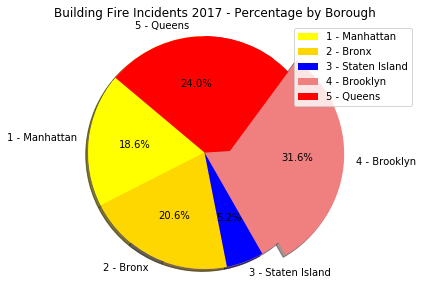

In [20]:
labels = bf['Borough']
sizes = bf['Fire_Incidents']
colors = ['yellow', 'gold', 'blue', 'lightcoral','red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
explode = (0, 0, 0, 0.2, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.tight_layout()
plt.title('Building Fire Incidents 2017 - Percentage by Borough')
plt.show()

***

**In our final analysis, we look at FDNY Monthly Response Times.  We read in the CSV and find that the data includes columns such as incident by borough and average response time.**

In [21]:
# reads csv data
response_all = pd.read_csv('data/FDNY_Monthly_Response_Times.csv')
response_all.head()

,YEARMONTH,INCIDENTCLASSIFICATION,INCIDENTBOROUGH,INCIDENTCOUNT,AVERAGERESPONSETIME
0,2009/07,All Fire/Emergency Incidents,Citywide,40850,04:27
1,2009/07,All Fire/Emergency Incidents,Manhattan,10709,04:32
2,2009/07,All Fire/Emergency Incidents,Bronx,8137,04:37
3,2009/07,All Fire/Emergency Incidents,Staten Island,2205,04:45
4,2009/07,All Fire/Emergency Incidents,Brooklyn,11505,04:01


**We will only use and analyze the columns corresponding to incidents by borough and average response time.**

In [22]:
response = pd.read_csv('data/FDNY_Monthly_Response_Times.csv', usecols = ['INCIDENTBOROUGH','AVERAGERESPONSETIME'], index_col = 'INCIDENTBOROUGH')
response.head(6)

,AVERAGERESPONSETIME
INCIDENTBOROUGH,
Citywide,04:27
Manhattan,04:32
Bronx,04:37
Staten Island,04:45
Brooklyn,04:01
Queens,04:43


**We can display the lowest average response time.**

In [23]:
response['AVERAGERESPONSETIME'].min()

'03:16'

**And the highest average response time.**

In [24]:
response['AVERAGERESPONSETIME'].max()

'07:06'

**We examine the datatype of the average response time column.**

In [25]:
response.dtypes

AVERAGERESPONSETIME    object
dtype: object

**We convert the average response time data type to datetime.**

In [26]:
# convert AVERAGERESPONSETIME to datetime object
response['AVERAGERESPONSETIME'] = pd.to_datetime(response['AVERAGERESPONSETIME'])
response.dtypes

AVERAGERESPONSETIME    datetime64[ns]
dtype: object

In [27]:
response.head(6)

,AVERAGERESPONSETIME
INCIDENTBOROUGH,
Citywide,2018-05-17 04:27:00
Manhattan,2018-05-17 04:32:00
Bronx,2018-05-17 04:37:00
Staten Island,2018-05-17 04:45:00
Brooklyn,2018-05-17 04:01:00
Queens,2018-05-17 04:43:00


**After conversion, we subtract the current date to leave only the time value.**

In [28]:
response['AVERAGERESPONSETIME'] = response['AVERAGERESPONSETIME'] - pd.to_datetime('today')
response.head(6)

,AVERAGERESPONSETIME
INCIDENTBOROUGH,
Citywide,04:27:00
Manhattan,04:32:00
Bronx,04:37:00
Staten Island,04:45:00
Brooklyn,04:01:00
Queens,04:43:00


**We convert the minutes and seconds into total seconds, so that we get a numeric value for making calculations.**

In [29]:
response['AVERAGERESPONSETIME'] = response['AVERAGERESPONSETIME'].dt.total_seconds()
response.head(6)

,AVERAGERESPONSETIME
INCIDENTBOROUGH,
Citywide,16020.0
Manhattan,16320.0
Bronx,16620.0
Staten Island,17100.0
Brooklyn,14460.0
Queens,16980.0


In [30]:
averagetime = response.groupby('INCIDENTBOROUGH')['AVERAGERESPONSETIME'].mean().sort_values()
averagetime

INCIDENTBOROUGH
Brooklyn         14640.824176
Citywide         16353.461538
Staten Island    16902.774725
Manhattan        16947.032967
Bronx            17112.774725
Queens           17197.417582
Name: AVERAGERESPONSETIME, dtype: float64

**We use a simple bar graph to visualize the answer to the question:**

## Q7: What is the FDNY average response time by borough?

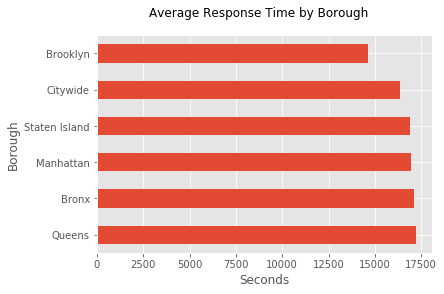

In [31]:
plt.style.use("ggplot")
averagetime.plot.barh().invert_yaxis()
plt.ylabel('Borough')
plt.xlabel('Seconds')
plt.suptitle('Average Response Time by Borough')

**Since values in seconds might be easy to visualize but more difficult to comprehend, we convert the values back into a datetime format and then strip the date, leaving only the time.**

In [32]:
averagemin = pd.to_datetime(averagetime, unit = 's')
minutesonly = averagemin.dt.time
minutesonly

INCIDENTBOROUGH
Brooklyn         04:04:00.824176
Citywide         04:32:33.461538
Staten Island    04:41:42.774725
Manhattan        04:42:27.032967
Bronx            04:45:12.774725
Queens           04:46:37.417582
Name: AVERAGERESPONSETIME, dtype: object